# Neuronale Netze mit Scikit-Learn

```{admonition} Lernziele
:class: important
* Sie können mit Scikit-Learn ein neuronales Netz zur Klassifikation trainieren.
```

## Neuronale Netze zur Klassifikation

Schauen wir uns an, wie das Training eines tiefen neuronalen Netzes in
Scikit-Learn funktioniert. Dazu benutzen wir aus dem Untermodul
``sklearn.neural_network`` den ``MLPClassifier``, also ein
Multi-Layer-Perzeptron für Klassifikationsaufgaben:

> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

Wir benutzen künstliche Daten, um die Anwendung des MLPClassifiers zu
demonstrieren.

/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Künstliche Messdaten')

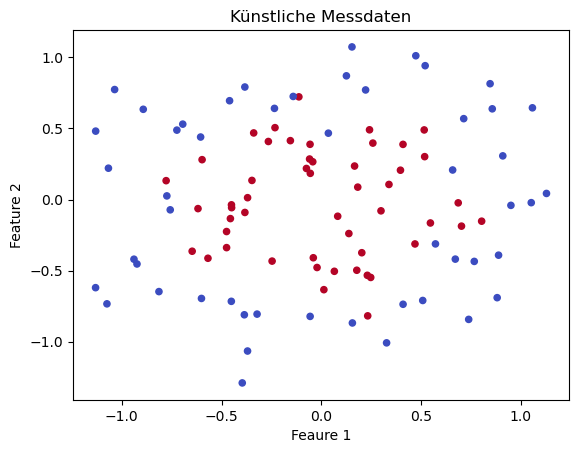

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pylab as plt

# erzeuge künstliche Daten
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=20, c=y, cmap='coolwarm');
ax.set_xlabel('Feaure 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Auswahl des Models
# solver = 'lbfgs' für kleine Datenmengen, solver = 'adam' für große Datenmengen, eher ab 10000
# alpha = Lernrate
# hidden_layer: Anzahl der Neuronen pro verdeckte Schicht und Anzahl der verdeckten Schichten
model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=[5, 5])

# Split Trainings- / Testdaten
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Training
model.fit(X_train, y_train)

# Validierung 
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print('Score für Trainingsdaten: {:.2f}'.format(score_train))
print('Score für Testdaten: {:.2f}'.format(score_test))

Score für Trainingsdaten: 0.92
Score für Testdaten: 0.84


/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Funktioniert gar nicht mal schlecht :-) Wir zeichen die Entscheidungsgrenzen
ein, um zu sehen, wo das neuronale Netzt die Trennlinien zieht.

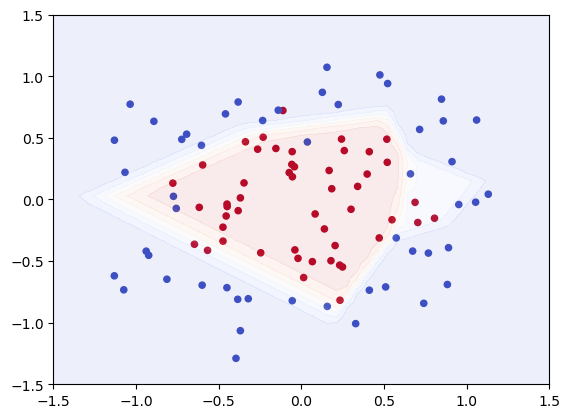

In [3]:
import numpy as np

gridX, gridY = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
gridZ = model.predict_proba(np.column_stack([gridX.ravel(), gridY.ravel()]))[:, 1]
Z = gridZ.reshape(gridX.shape)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=20, c=y, cmap='coolwarm');
ax.contourf(gridX, gridY, Z, cmap='coolwarm', alpha=0.1);

Im Folgenden wollen wir uns ansehen, welche Bedeutung die optionalen Parameter
haben. Dazu zunächst noch einmal der komplette Code, aber ohne einen Split in
Trainings- und Testdaten:

Score: 0.92


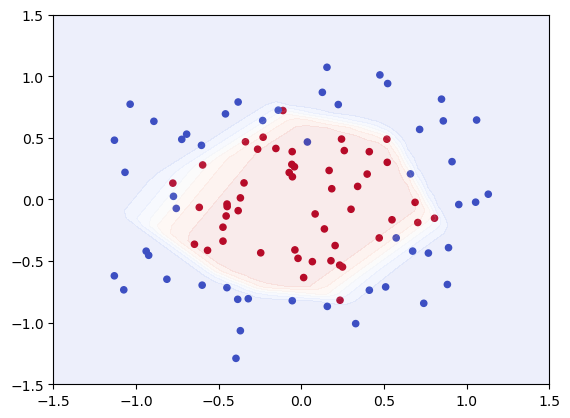

In [4]:
# setze verschiedene Werte für alpha und Architektur der verdeckten Schicht
my_alpha = 0.1
my_hidden_layers = [10,10]

# erzeuge künstliche Daten
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)

# Auswahl des Model
model = MLPClassifier(solver='lbfgs', alpha=my_alpha, hidden_layer_sizes=my_hidden_layers)

# Training und Validierung
model.fit(X, y)
print('Score: {:.2f}'.format(model.score(X, y)))

# Visualisierung
gridX, gridY = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
gridZ = model.predict_proba(np.column_stack([gridX.ravel(), gridY.ravel()]))[:, 1]
Z = gridZ.reshape(gridX.shape)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=20, c=y, cmap='coolwarm');
ax.contourf(gridX, gridY, Z, cmap='coolwarm', alpha=0.1);

Wie Sie sehen, ist es schwierig, ein gutes Verhältnis von Lernrate $\alpha$ und
der Architektur des neuronalen Netzes (= Anzahl der Neuronen pro verdeckter
Schicht und Anzahl verdeckter Schichten) zu finden. Auch fällt das Ergebnis
jedesmal ein wenig anders aus, weil stochastische Verfahren im Hintergrund für
das Trainieren der Gewichte benutzt werden. Aus diesem Grund sollten neuronale
Netze nur eingesetzt werden, wenn sehr große Datenmengen vorliegen und dann noch
ist das Finden der besten Architektur eine große Herausforderung.